In [3]:
import sys
import pandas
import seaborn
import matplotlib
import sklearn

print(sys.version)
print(pandas.__version__)
print(seaborn.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)



3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 23:09:28) [MSC v.1916 64 bit (AMD64)]
0.24.2
0.9.0
3.0.3
0.20.3


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df_game=pd.read_csv("games.csv")

In [7]:
df_game.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [9]:
df_game.shape

(81312, 20)

Lets See our target variable

(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

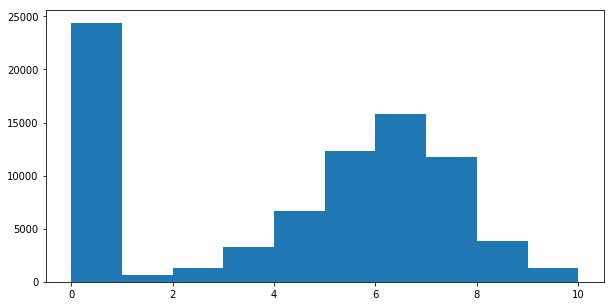

In [13]:
plt.figure(figsize=[10,5])
plt.hist(df_game["average_rating"])

This is kind of unexpected, so we see here we have almost 24000 games with the average rating of 0's. And then we have a right skew where we have an avg of 6.

Let's print few rows of games where the avg rating is 0. and > 0

In [14]:
df_game[df_game["average_rating"]==0].head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [18]:
df_game[df_game["average_rating"]>0].head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


looks like the games which have avg_rating of 0 are old and the maxplayers are less. and also there may be 0 users rated to some of the games so lets remove the games with 0 user rating

In [22]:
df_game[df_game["users_rated"]==0]["users_rated"].count()

24380

In [23]:
# remove all unrated rows
df_game=df_game[df_game["users_rated"]>0]

# removing all rows with null
df_game=df_game.dropna()

In [25]:
df_game.shape

(56894, 20)

(array([  602.,  1231.,  2824.,  5206.,  8223., 13593., 13849.,  8470.,
         2224.,   672.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

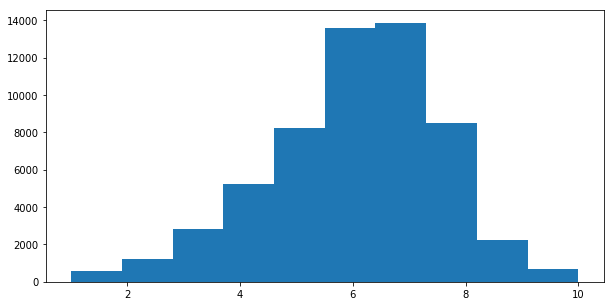

In [26]:
# we do the same plot again
plt.figure(figsize=[10,5])
plt.hist(df_game["average_rating"])

Now it looks good!

In [27]:
df_game.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

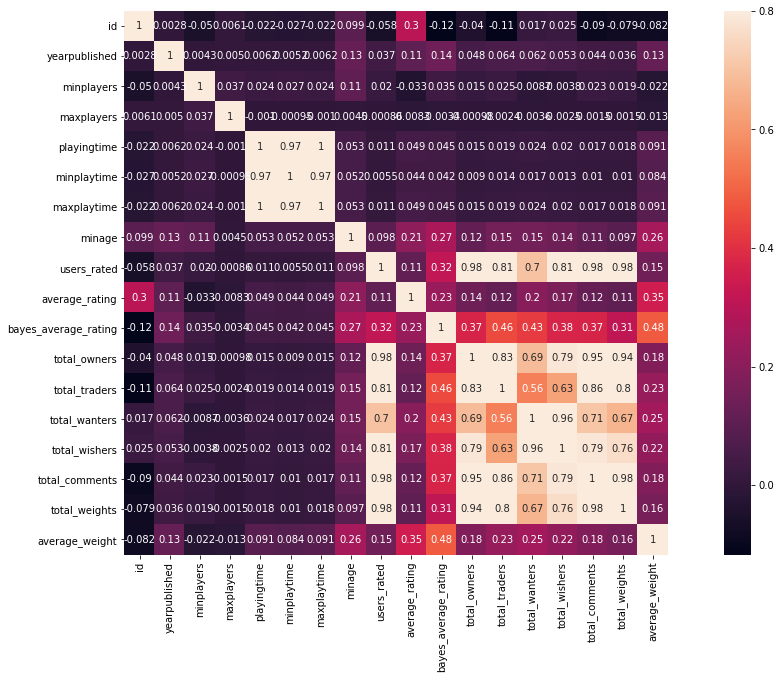

In [37]:
corr=df_game.corr()
plt.figure(figsize=(20,10))

sns.heatmap(corr, vmax=0.8,annot=True,square=True)

There are lot of correlated features in here so lets remove some of them.

In [50]:
features=["average_rating","type","name","id","minplaytime","maxplaytime","total_owners","total_traders","total_wanters","total_wishers","total_comments","total_weights"]

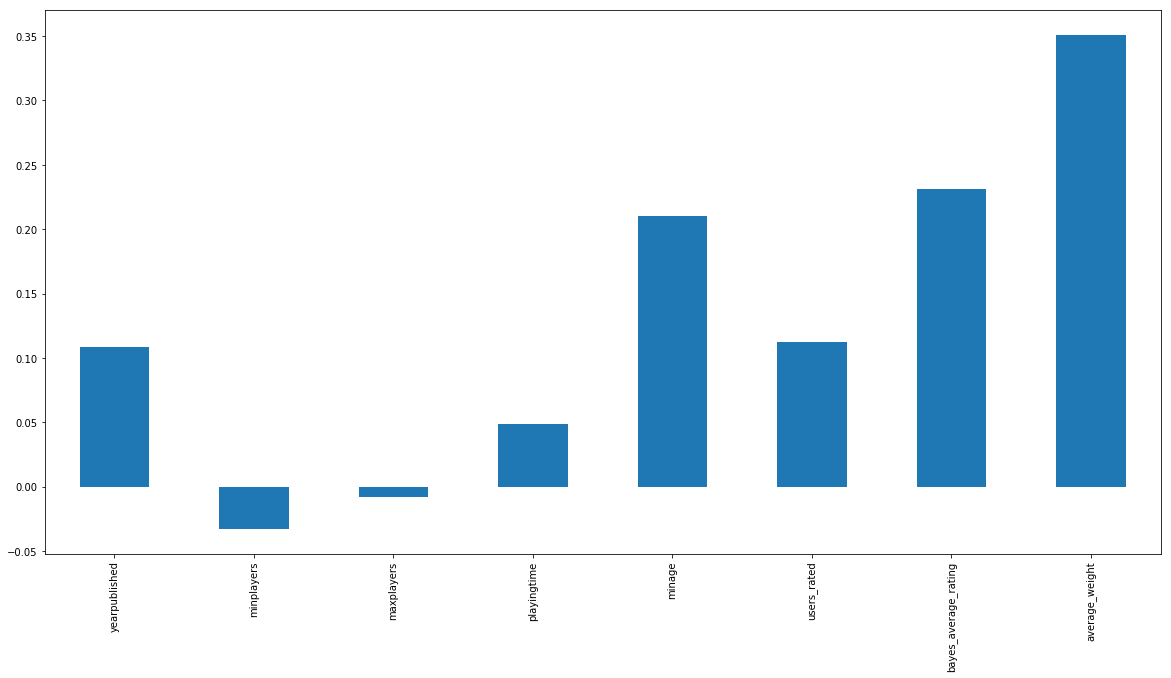

In [51]:
df_game.drop(columns=features).corrwith(df_game["average_rating"]).plot.bar(figsize=(20,10))

In [52]:
df_game.drop(columns=features).head()

,yearpublished,minplayers,maxplayers,playingtime,minage,users_rated,bayes_average_rating,average_weight
0,2005.0,2.0,2.0,180.0,13.0,20113,8.22186,3.4785
1,2012.0,2.0,5.0,150.0,12.0,14383,8.14232,3.8939
2,2013.0,1.0,7.0,210.0,12.0,9262,8.06886,3.7761
3,2006.0,2.0,4.0,240.0,12.0,13294,8.05804,4.1590
4,2002.0,2.0,5.0,150.0,12.0,39883,8.04524,3.2943


In [54]:
X_train,X_test,y_train,y_test=train_test_split(df_game.drop(columns=features),df_game["average_rating"],test_size=0.2,random_state=123)

In [56]:
X_train.shape

(45515, 8)

In [57]:
X_test.shape

(11379, 8)

In [58]:
from sklearn.linear_model import LinearRegression

In [72]:
ln_model=LinearRegression(normalize=True)

In [73]:
ln_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [74]:
pred=ln_model.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
print(mean_squared_error(y_test,pred))

2.1030671539917893


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10, random_state=123)

In [69]:
RFR.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False)

In [70]:
pred=RFR.predict(X_test)

In [71]:
print(mean_squared_error(y_test,pred))

1.5261536169242065


In [87]:
df_game.iloc[0]

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object

In [88]:
pred_LR=ln_model.predict(df_game.drop(columns=features).iloc[0].values.reshape(1,-1))

In [89]:
pred_RFR=RFR.predict(df_game.drop(columns=features).iloc[0].values.reshape(1,-1))

In [90]:
pred_LR

array([8.23647567])

In [91]:
pred_RFR

array([7.99954359])